In [1]:
import sys
sys.path.insert(0, './../')
import numpy as np
import numba as nb

# ~~~~~~~~~~~~~~~~~~~~~~~
# using Human3.6M
# ~~~~~~~~~~~~~~~~~~~~~~~
import mocap.datasets.cmu as CMU

all_subjects = CMU.ALL_SUBJECTS

ds = CMU.CMU(['01', '02'], remove_global_Rt=True)

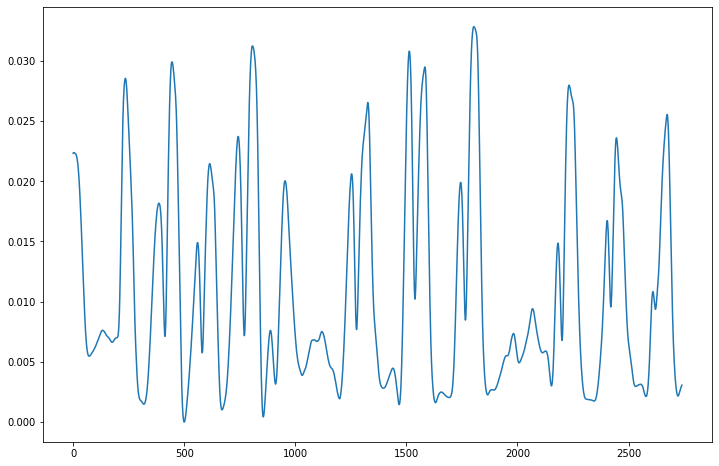

In [26]:
%matplotlib inline
import matplotlib.pylab as plt

seq = ds[0]
seq = seq.reshape((len(seq), -1))

step_size = 10

take_frame = 500

a = seq[take_frame:take_frame+step_size].reshape((1, -1))

@nb.njit(nb.float32[:, :](
    nb.float32[:, :], nb.int64
), nogil=True)
def build_cor_seq(seq, step_size):
    n_frames, dim = seq.shape
    
    result = np.empty((n_frames - step_size, 
                       dim * step_size),
                      dtype=np.float32)
    
    for t in range(n_frames - step_size):
        item = seq[t:t + step_size].flatten()
        result[t] = item
    
    return result

cor_seq = build_cor_seq(seq, step_size)

dif = np.mean((cor_seq - a)**2, axis=1)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)


ax.plot(range(len(dif)), dif)

plt.show()